In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px

# Optional: for displaying plots inline (if using Jupyter)
%matplotlib inline
sns.set(style="whitegrid")

# Load data from CSV file
df= pd.read_csv('data/combined_final.csv')
df['weight'] = df['weight'].str.replace("g"," ")
df['weight'] = df['weight'].astype(float)
df['price_in_eur'] = df['price_in_eur'].str.replace(",",".")
df['price_in_eur'] = df['price_in_eur'].str.replace(" ","")
df['price_in_eur'] = df['price_in_eur'].astype(float)
df['price per g']= df['price_in_eur'] / df['weight']

def extract_weight(row):
    name = row['name'].lower()
    match = re.search(r'(\d+(?:\.\d+)?)\s*(oz|ounce|ounces|g|gram|grams)?', name)
    if match:
        value = float(match.group(1))
        unit = match.group(2)
        if unit and ('oz' in unit or 'ounce' in unit):
            return round(value * 28.35, 2)  # Convert oz to grams
        else:
            return value  # Assume it's grams
    return None  # fallback if no match

# Apply to the DataFrame
df['weight'] = df.apply(extract_weight, axis=1)

# Recalculate price per gram
df['price per g'] = df['price_in_eur'] / df['weight']
df=df[df['price per g'] < 50]
df=df[df['weight'] < 1000]

In [ ]:
# Group by seller and count unique sources
seller_sources = df.groupby('seller')['source'].nunique()

# Filter sellers that appear in more than one source
multi_source_sellers = seller_sources[seller_sources > 1].index.tolist()

# Show all rows for these sellers
result = df[df['seller'].isin(multi_source_sellers)]

26 vendors are on multiple sites, 190 in total

Dataset Overview:
Number of records: 4115
Number of columns: 20

Column Names:
- name
- destination
- seller
- price_in_eur
- weight
- Strain
- Type
- Rating_weed
- Effects
- Flavor
- Description
- weed
- hash
- source
- origin
- items_sold
- Rating_seller
- price per g
- combined_text
- product_fingerprint

First few rows of the dataset:

Data Types and Missing Values:

Basic Statistics for Numerical Columns:

Unique Values in Categorical Columns:
name: 2679 unique values
destination: 25 unique values
seller: 190 unique values
Strain: 361 unique values
Type: 3 unique values
Effects: 289 unique values
Flavor: 261 unique values
Description: 359 unique values
source: 4 unique values
origin: 19 unique values
combined_text: 2671 unique values
product_fingerprint: 348 unique values


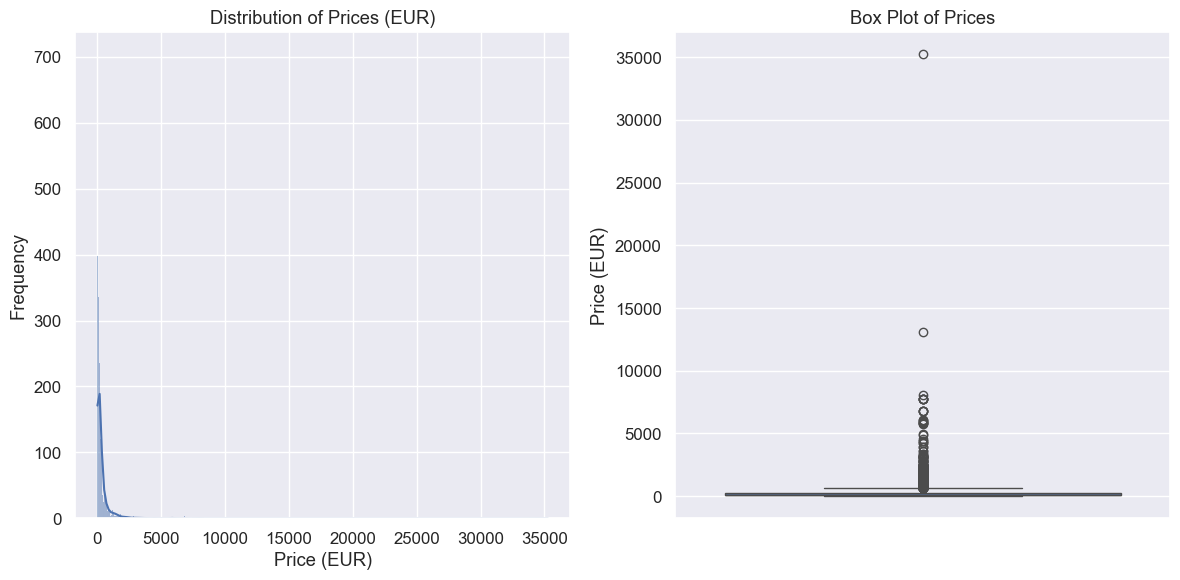

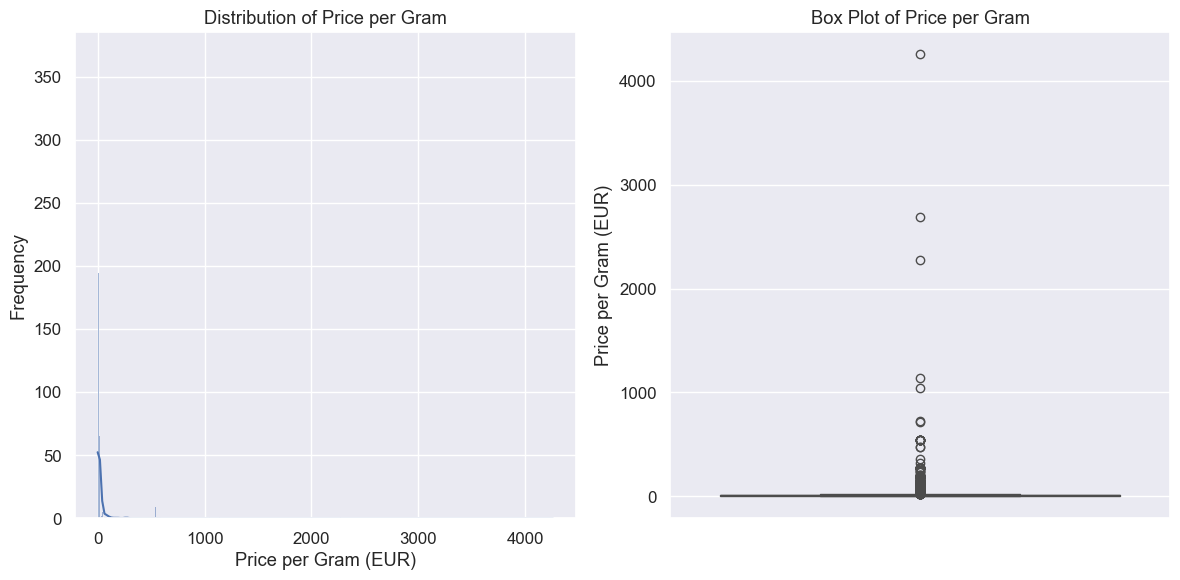

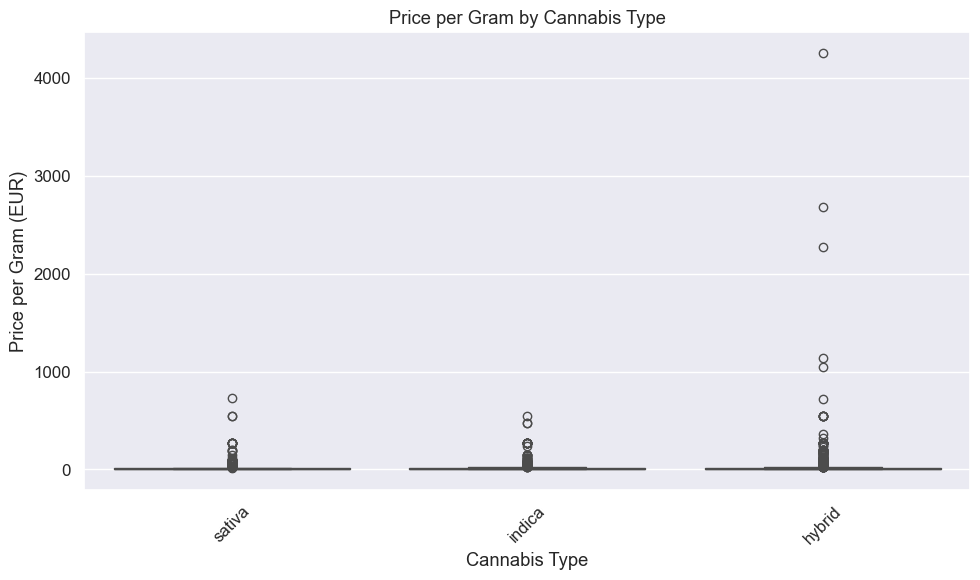

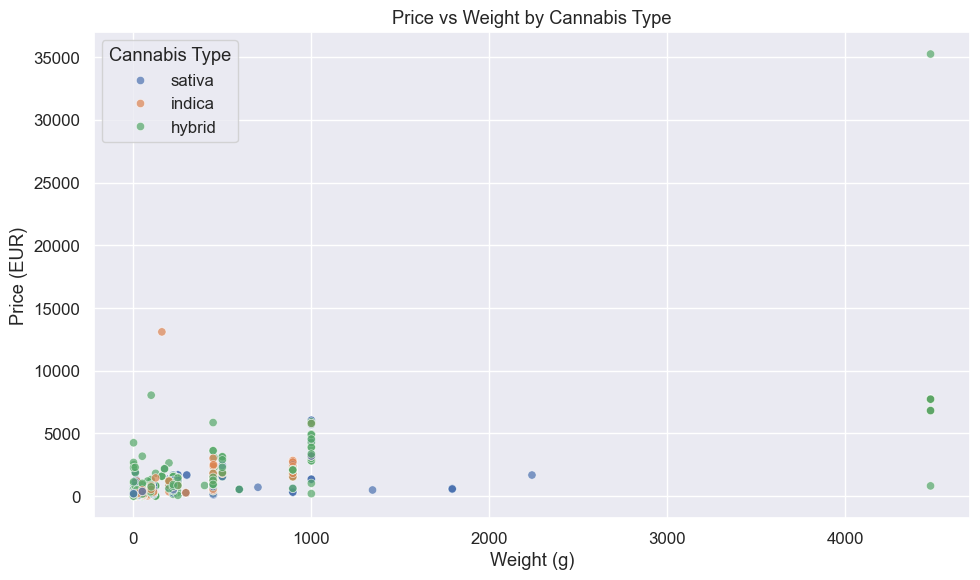

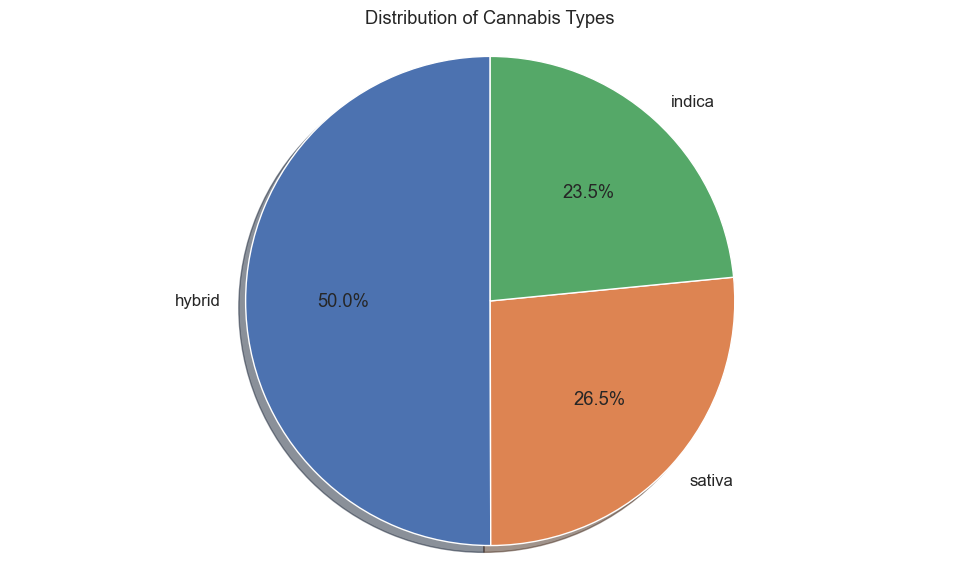

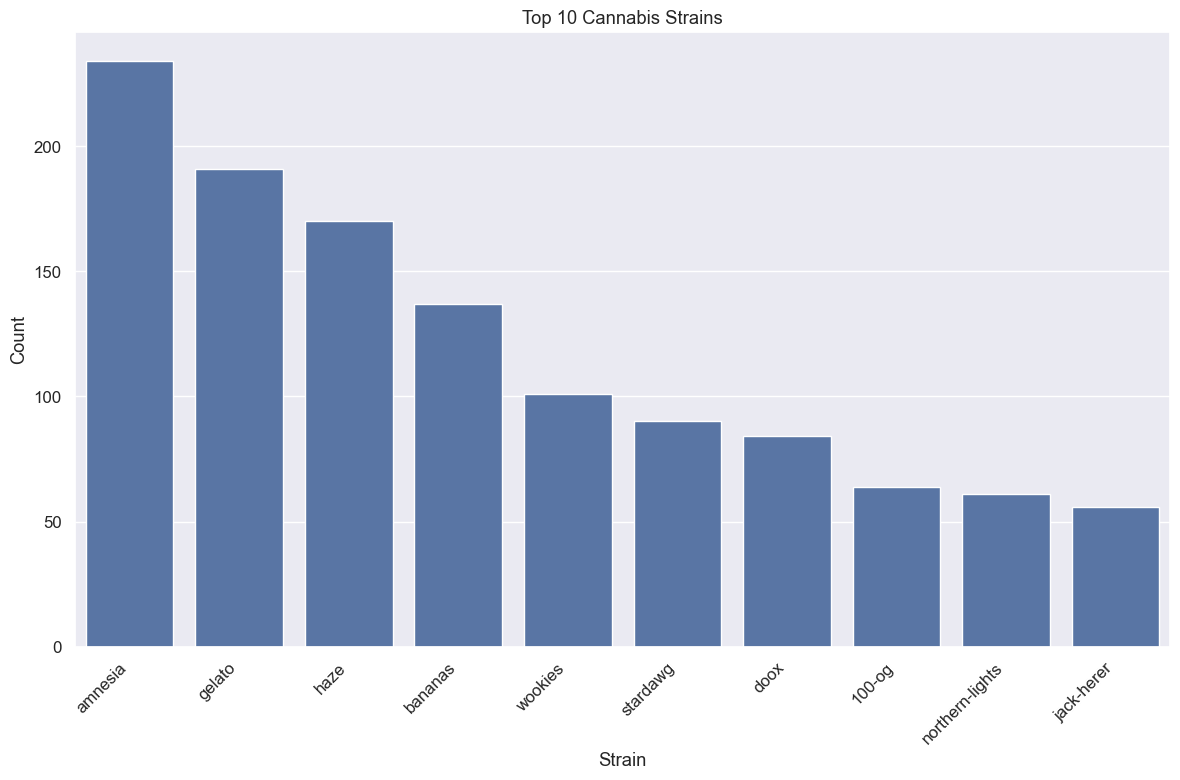

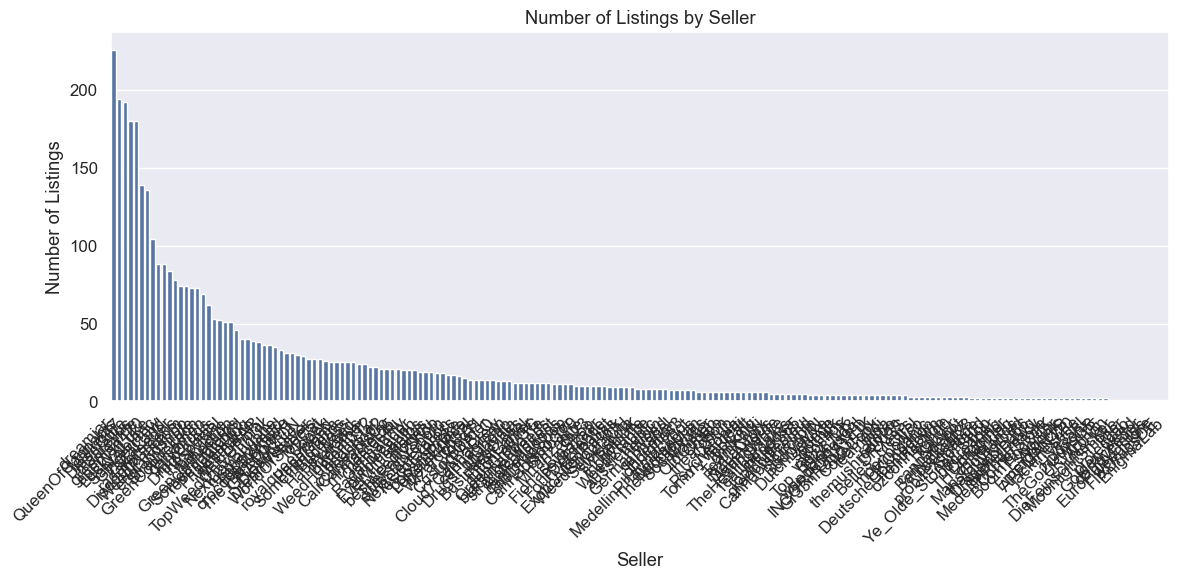

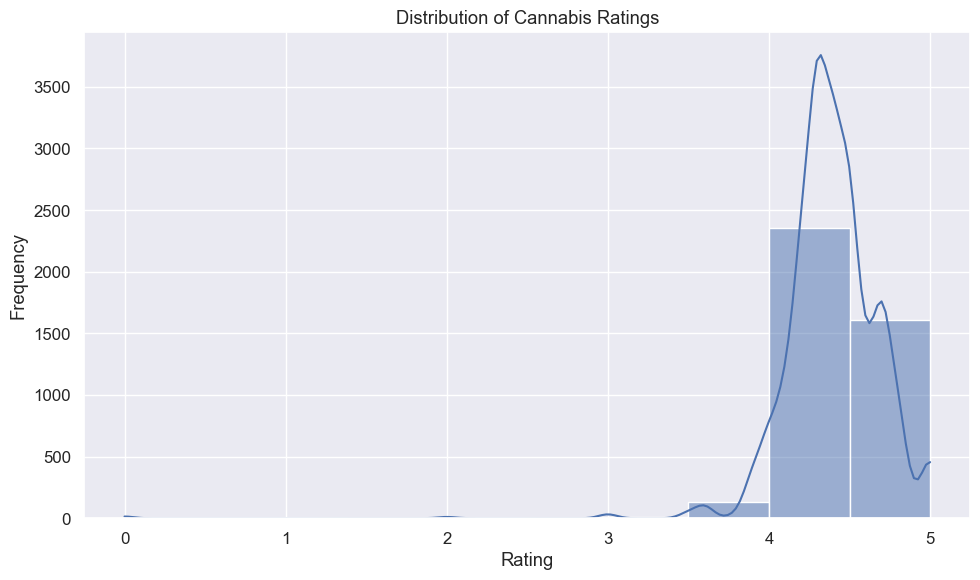

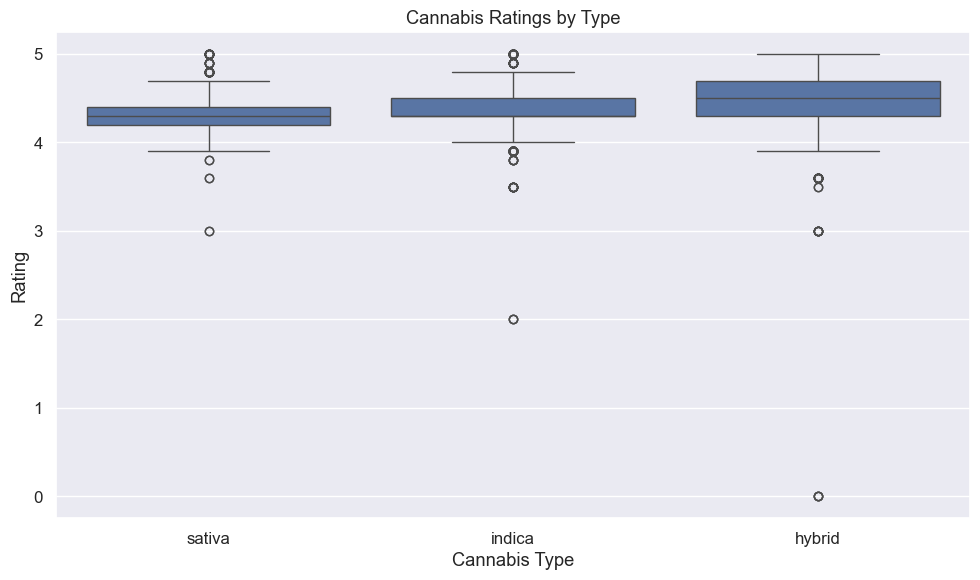

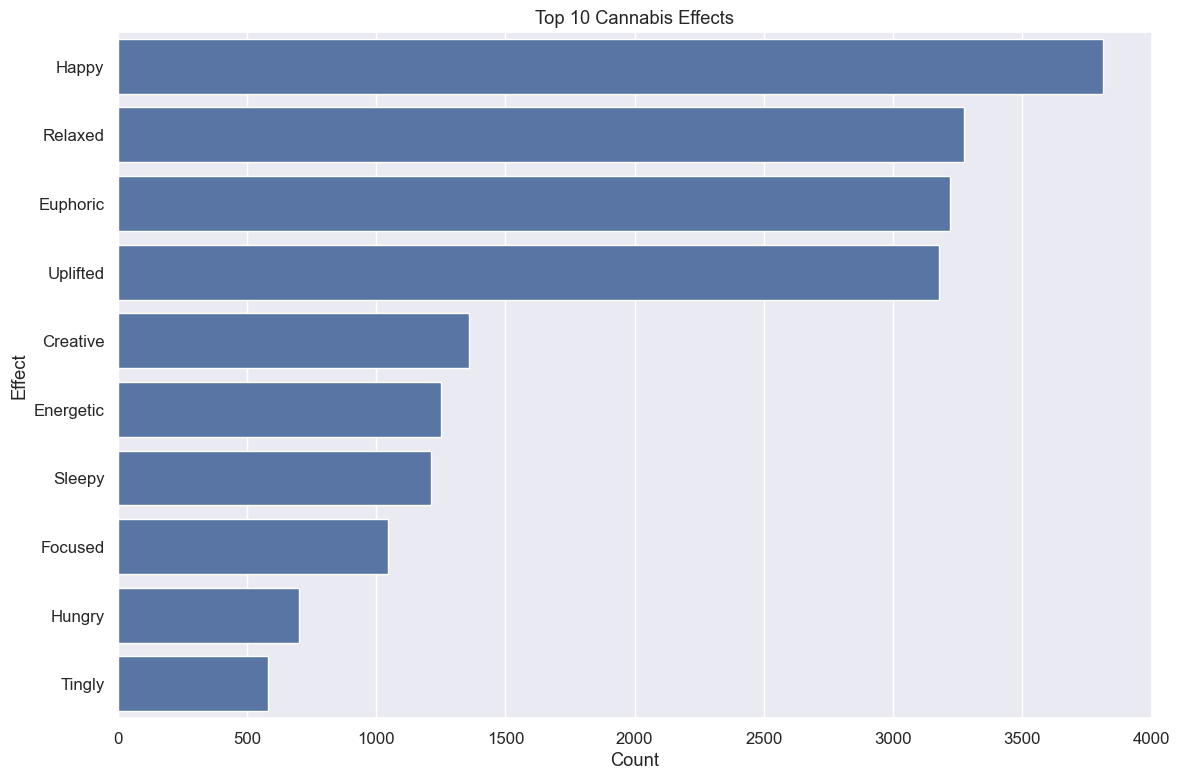

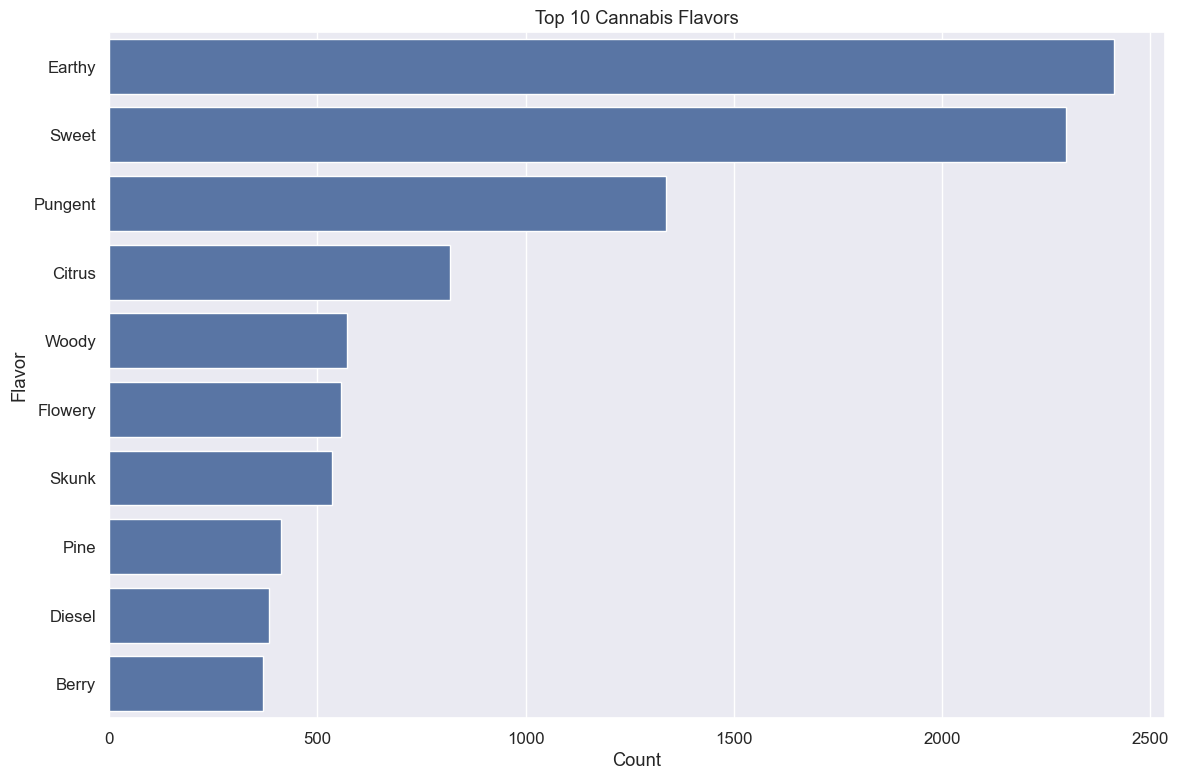

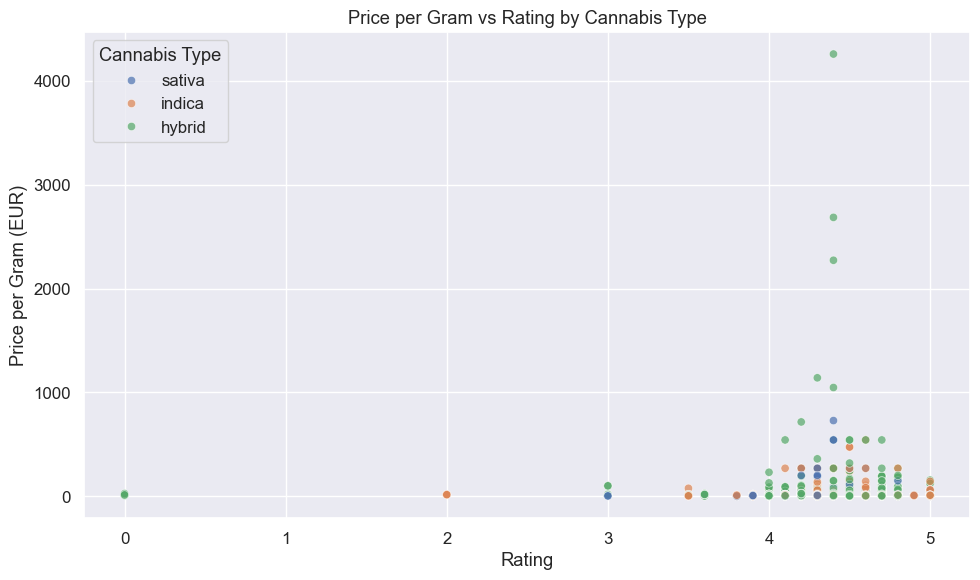

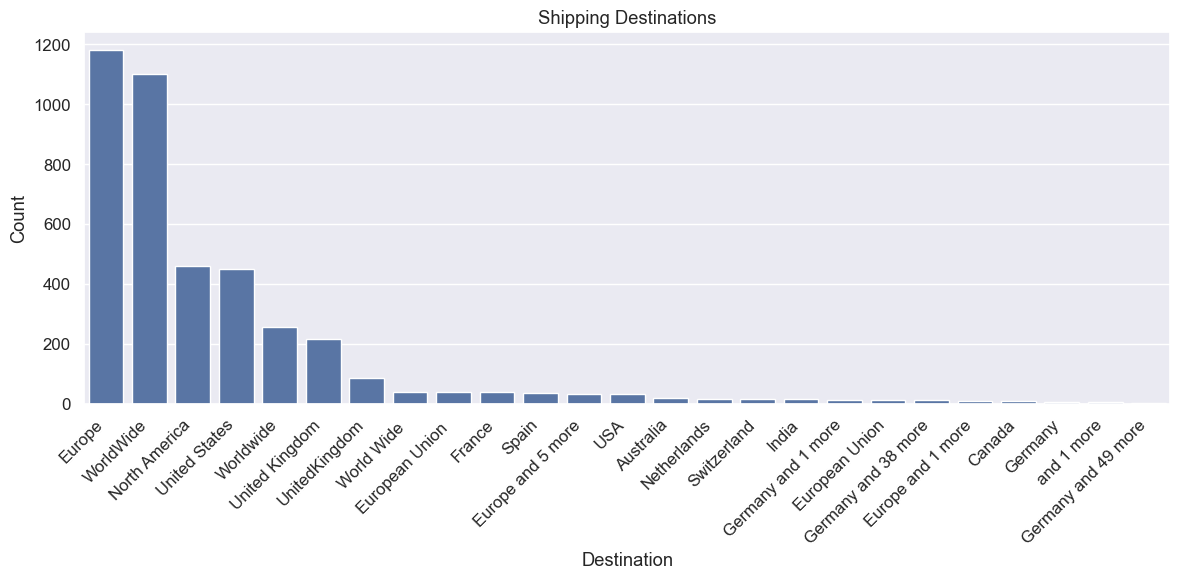

C:\Users\niels\AppData\Local\Temp\ipykernel_11488\2082947086.py:237: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



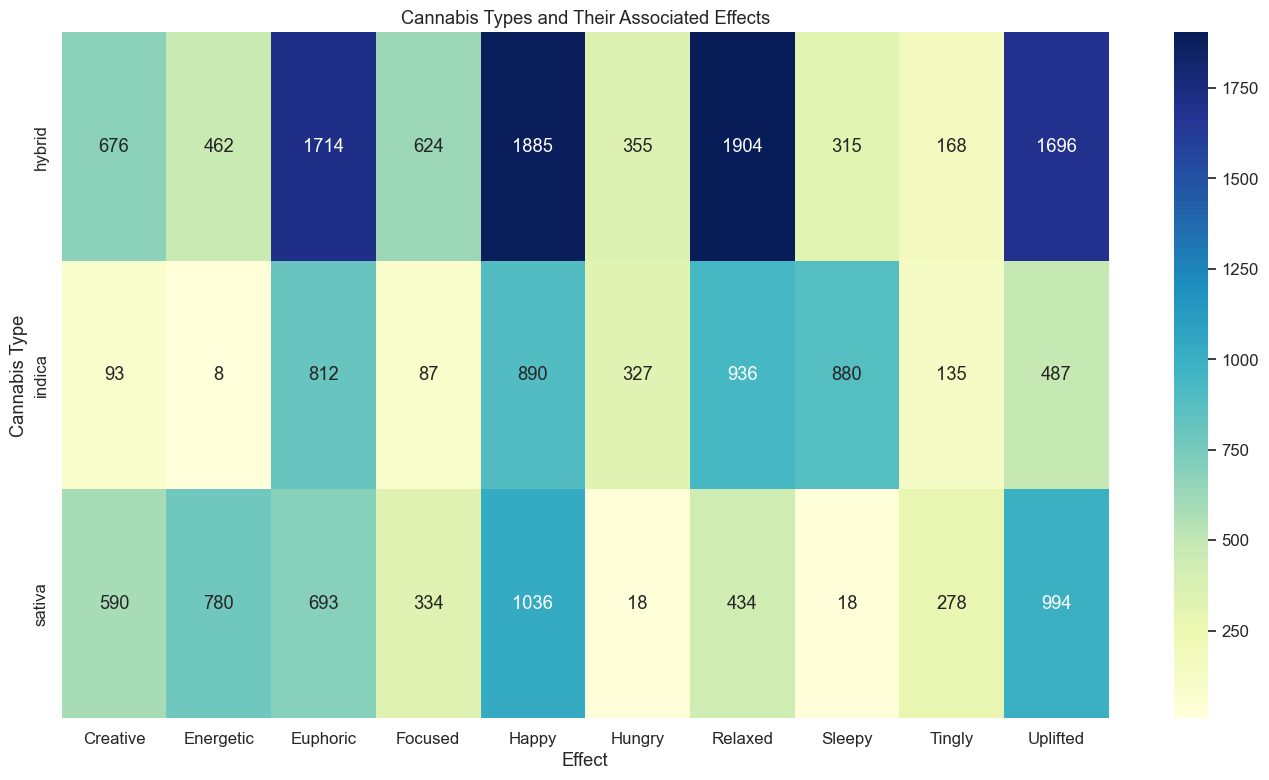


Summary Statistics by Cannabis Type:

Summary Statistics by Seller:

Correlation Matrix:


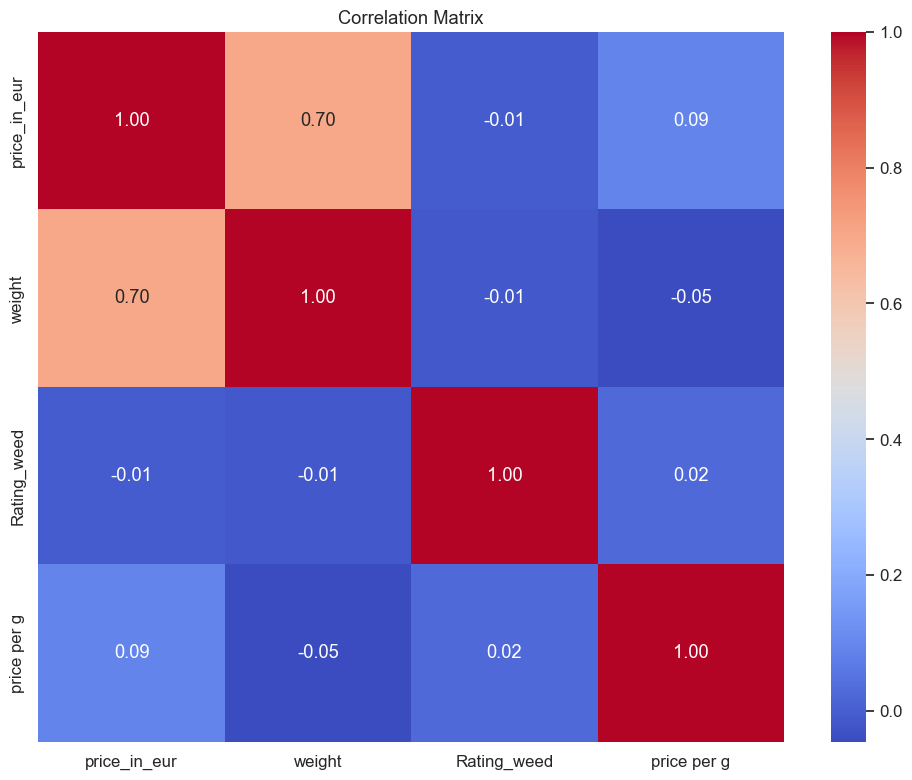


Key Findings from EDA:
1. The dataset contains 4115 cannabis product listings with 20 different attributes.
2. Average price per gram: € 20.9
3. Most common cannabis type: hybrid
4. Most common strain: amnesia
5. Top seller by number of listings: dreamjar
6. Average cannabis rating: 4.39 out of 5
7. Most common effect: Happy
8. Most common flavor: Earthy
9. Most listings ship to: Europe


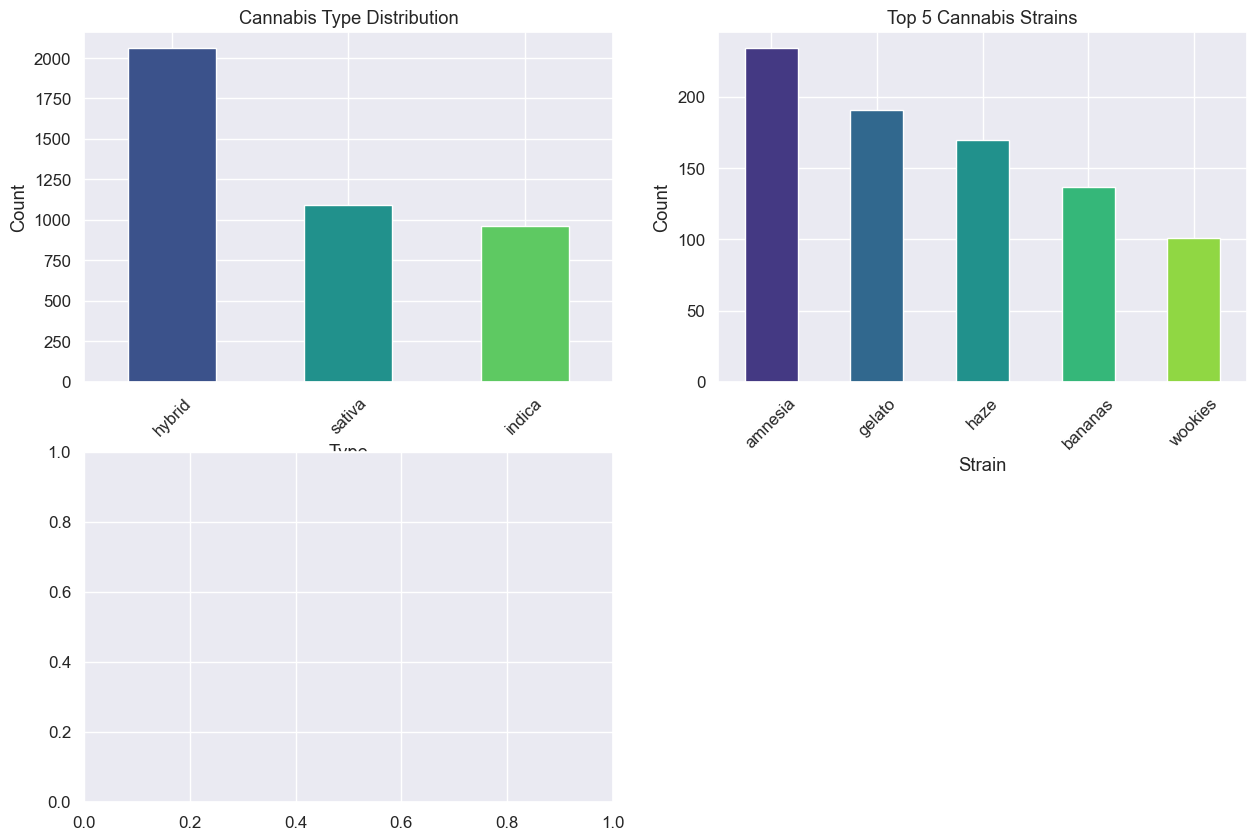

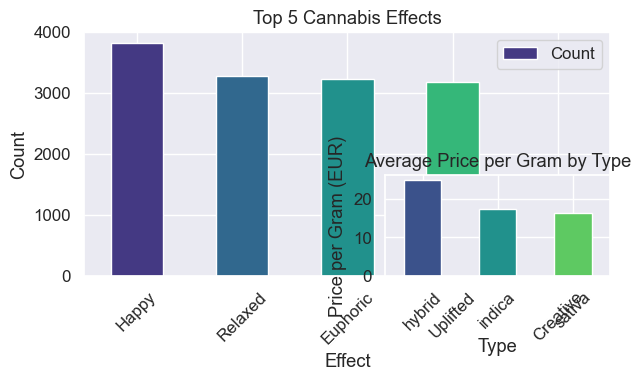


EDA Complete!


In [ ]:
# Set the style for  plots
plt.style.use('ggplot')
sns.set_palette("viridis")
sns.set(font_scale=1.1)


# Display basic information about the dataset
print("Dataset Overview:")
print(f"Number of records: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nColumn Names:")
for col in df.columns:
    print(f"- {col}")

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
df.head()

# Check data types and missing values
print("\nData Types and Missing Values:")
df_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Missing Values': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
df_info

# Basic statistics for numerical columns
print("\nBasic Statistics for Numerical Columns:")
df.describe()

# Count the number of unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# Analyze the distribution of prices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['price_in_eur'], kde=True)
plt.title('Distribution of Prices (EUR)')
plt.xlabel('Price (EUR)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['price_in_eur'])
plt.title('Box Plot of Prices')
plt.ylabel('Price (EUR)')
plt.tight_layout()
plt.show()

# Analyze price per gram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['price per g'], kde=True)
plt.title('Distribution of Price per Gram')
plt.xlabel('Price per Gram (EUR)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['price per g'])
plt.title('Box Plot of Price per Gram')
plt.ylabel('Price per Gram (EUR)')
plt.tight_layout()
plt.show()

# Compare price per gram across different cannabis types
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='price per g', data=df)
plt.title('Price per Gram by Cannabis Type')
plt.xlabel('Cannabis Type')
plt.ylabel('Price per Gram (EUR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Explore the relationship between weight and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='price_in_eur', data=df, hue='Type', alpha=0.7)
plt.title('Price vs Weight by Cannabis Type')
plt.xlabel('Weight (g)')
plt.ylabel('Price (EUR)')
plt.legend(title='Cannabis Type')
plt.tight_layout()
plt.show()

# Analyze cannabis types distribution
plt.figure(figsize=(10, 6))
type_counts = df['Type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribution of Cannabis Types')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Analyze strains distribution
plt.figure(figsize=(12, 8))
strain_counts = df['Strain'].value_counts().head(10)
sns.barplot(x=strain_counts.index, y=strain_counts.values)
plt.title('Top 10 Cannabis Strains')
plt.xlabel('Strain')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze sellers
plt.figure(figsize=(12, 6))
seller_counts = df['seller'].value_counts()
sns.barplot(x=seller_counts.index, y=seller_counts.values)
plt.title('Number of Listings by Seller')
plt.xlabel('Seller')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating_weed'], kde=True, bins=10)
plt.title('Distribution of Cannabis Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Analyze ratings by cannabis type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Rating_weed', data=df)
plt.title('Cannabis Ratings by Type')
plt.xlabel('Cannabis Type')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

# Extract and analyze effects
def extract_effects(effects_str):
    if pd.isna(effects_str):
        return []
    return [effect.strip() for effect in effects_str.split(',')]

all_effects = []
for effects in df['Effects'].dropna():
    all_effects.extend(extract_effects(effects))
    
effects_counter = Counter(all_effects)
effects_df = pd.DataFrame({
    'Effect': list(effects_counter.keys()),
    'Count': list(effects_counter.values())
}).sort_values('Count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Effect', data=effects_df.head(10))
plt.title('Top 10 Cannabis Effects')
plt.xlabel('Count')
plt.ylabel('Effect')
plt.tight_layout()
plt.show()

# Extract and analyze flavors
def extract_flavors(flavors_str):
    if pd.isna(flavors_str):
        return []
    return [flavor.strip() for flavor in flavors_str.split(',')]

all_flavors = []
for flavors in df['Flavor'].dropna():
    all_flavors.extend(extract_flavors(flavors))
    
flavors_counter = Counter(all_flavors)
flavors_df = pd.DataFrame({
    'Flavor': list(flavors_counter.keys()),
    'Count': list(flavors_counter.values())
}).sort_values('Count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Flavor', data=flavors_df.head(10))
plt.title('Top 10 Cannabis Flavors')
plt.xlabel('Count')
plt.ylabel('Flavor')
plt.tight_layout()
plt.show()

# Analyze relationship between ratings and price per gram
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating_weed', y='price per g', data=df, hue='Type', alpha=0.7)
plt.title('Price per Gram vs Rating by Cannabis Type')
plt.xlabel('Rating')
plt.ylabel('Price per Gram (EUR)')
plt.legend(title='Cannabis Type')
plt.tight_layout()
plt.show()

# Analyze destinations
plt.figure(figsize=(12, 6))
dest_counts = df['destination'].value_counts()
sns.barplot(x=dest_counts.index, y=dest_counts.values)
plt.title('Shipping Destinations')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze the relationship between cannabis type and effects
# Create a heatmap of effects occurrence by cannabis type
type_effect_matrix = pd.DataFrame(columns=['Type', 'Effect', 'Count'])

for cannabis_type in df['Type'].unique():
    type_df = df[df['Type'] == cannabis_type]
    type_effects = []
    for effects in type_df['Effects'].dropna():
        type_effects.extend(extract_effects(effects))
    
    effect_counts = Counter(type_effects)
    for effect, count in effect_counts.items():
        type_effect_matrix = pd.concat([type_effect_matrix, pd.DataFrame({
            'Type': [cannabis_type],
            'Effect': [effect],
            'Count': [count]
        })], ignore_index=True)

# Get top effects for visualization
top_effects = effects_df.head(10)['Effect'].tolist()
filtered_matrix = type_effect_matrix[type_effect_matrix['Effect'].isin(top_effects)]

# Create a pivot table for the heatmap
heatmap_data = filtered_matrix.pivot_table(index='Type', columns='Effect', values='Count', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Cannabis Types and Their Associated Effects')
plt.xlabel('Effect')
plt.ylabel('Cannabis Type')
plt.tight_layout()
plt.show()

# Summary statistics grouped by cannabis type
print("\nSummary Statistics by Cannabis Type:")
type_summary = df.groupby('Type').agg({
    'price_in_eur': ['mean', 'min', 'max', 'count'],
    'weight': ['mean', 'min', 'max'],
    'Rating_weed': ['mean', 'min', 'max'],
    'price per g': ['mean', 'min', 'max']
})
type_summary

# Summary statistics grouped by seller
print("\nSummary Statistics by Seller:")
seller_summary = df.groupby('seller').agg({
    'price_in_eur': ['mean', 'min', 'max', 'count'],
    'weight': ['mean', 'min', 'max'],
    'Rating_weed': ['mean', 'min', 'max'],
    'price per g': ['mean', 'min', 'max']
})
seller_summary

# Correlation matrix
print("\nCorrelation Matrix:")
numeric_columns = ['price_in_eur', 'weight', 'Rating_weed', 'price per g']
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Key findings and insights summary
print("\nKey Findings from EDA:")
print("1. The dataset contains", df.shape[0], "cannabis product listings with", df.shape[1], "different attributes.")
print("2. Average price per gram: €", round(df['price per g'].mean(), 2))
print("3. Most common cannabis type:", df['Type'].value_counts().index[0])
print("4. Most common strain:", df['Strain'].value_counts().index[0])
print("5. Top seller by number of listings:", df['seller'].value_counts().index[0])
print("6. Average cannabis rating:", round(df['Rating_weed'].mean(), 2), "out of 5")
print("7. Most common effect:", effects_counter.most_common(1)[0][0])
print("8. Most common flavor:", flavors_counter.most_common(1)[0][0])
print("9. Most listings ship to:", df['destination'].value_counts().index[0])

# Create a visual summary of top insights
plt.figure(figsize=(15, 10))

# Subplot 1: Cannabis Type Distribution
plt.subplot(2, 2, 1)
type_counts.plot(kind='bar', color=sns.color_palette("viridis", len(type_counts)))
plt.title('Cannabis Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Subplot 2: Top 5 Strains
plt.subplot(2, 2, 2)
strain_counts.head(5).plot(kind='bar', color=sns.color_palette("viridis", 5))
plt.title('Top 5 Cannabis Strains')
plt.xlabel('Strain')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Subplot 3: Top 5 Effects
plt.subplot(2, 2, 3)
effects_df.head(5).plot(kind='bar', x='Effect', y='Count', color=sns.color_palette("viridis", 5))
plt.title('Top 5 Cannabis Effects')
plt.xlabel('Effect')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Subplot 4: Average Price per Gram by Type
plt.subplot(2, 2, 4)
avg_price_by_type = df.groupby('Type')['price per g'].mean().sort_values(ascending=False)
avg_price_by_type.plot(kind='bar', color=sns.color_palette("viridis", len(avg_price_by_type)))
plt.title('Average Price per Gram by Type')
plt.xlabel('Type')
plt.ylabel('Price per Gram (EUR)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\nEDA Complete!")


C:\Users\niels\AppData\Local\Temp\ipykernel_12548\430946005.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vendors.values, y=top_vendors.index, palette="viridis")


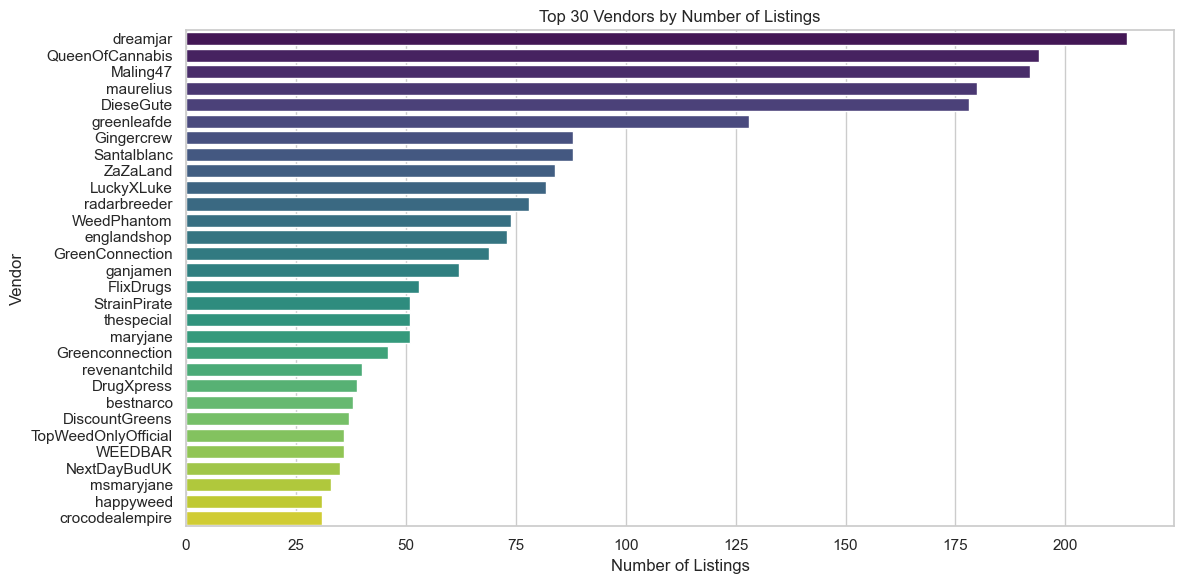

In [15]:
top_vendors = df['seller'].value_counts().head(30)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_vendors.values, y=top_vendors.index, palette="viridis")
plt.title("Top 30 Vendors by Number of Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Vendor")
plt.tight_layout()
plt.show()

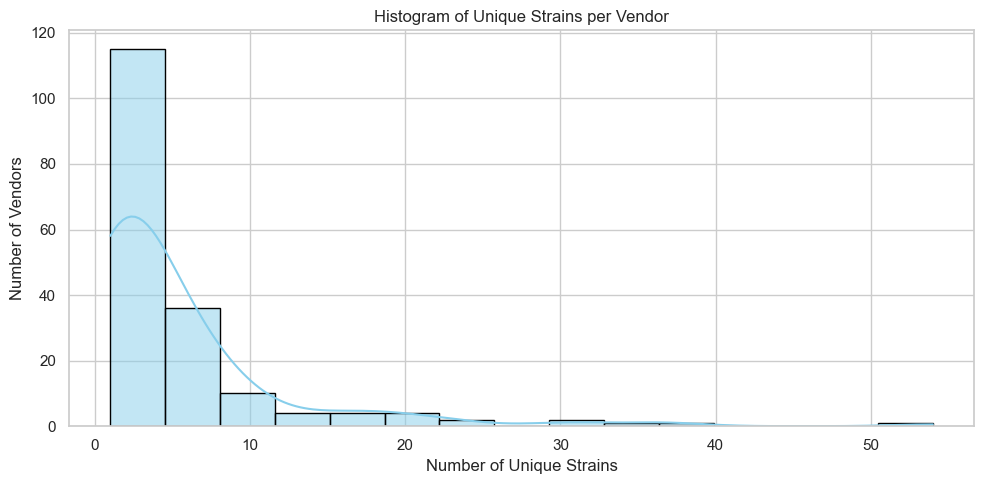

In [26]:
strain_diversity = df.groupby('seller')['Strain'].nunique()

plt.figure(figsize=(10, 5))
sns.histplot(strain_diversity, bins=15, kde=True, color='skyblue', edgecolor='black')
plt.title("Histogram of Unique Strains per Vendor")
plt.xlabel("Number of Unique Strains")
plt.ylabel("Number of Vendors")
plt.tight_layout()
plt.show()

C:\Users\niels\AppData\Local\Temp\ipykernel_12548\1041480630.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




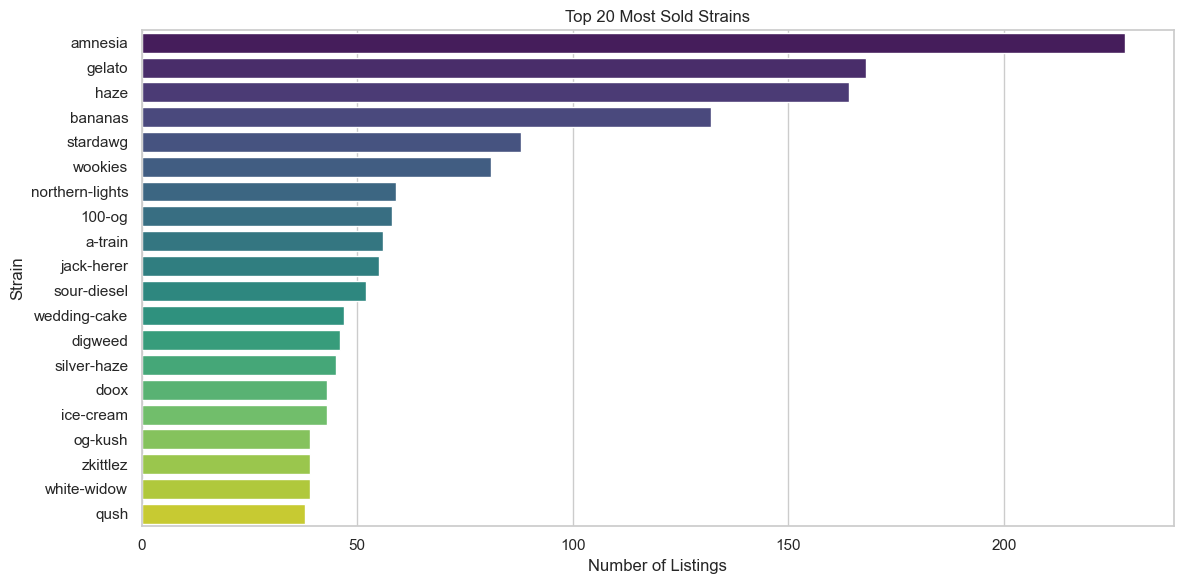

In [25]:
top_strains = df['Strain'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_strains.values, y=top_strains.index, palette="viridis")
plt.title("Top 20 Most Sold Strains")
plt.xlabel("Number of Listings")
plt.ylabel("Strain")
plt.tight_layout()
plt.show()

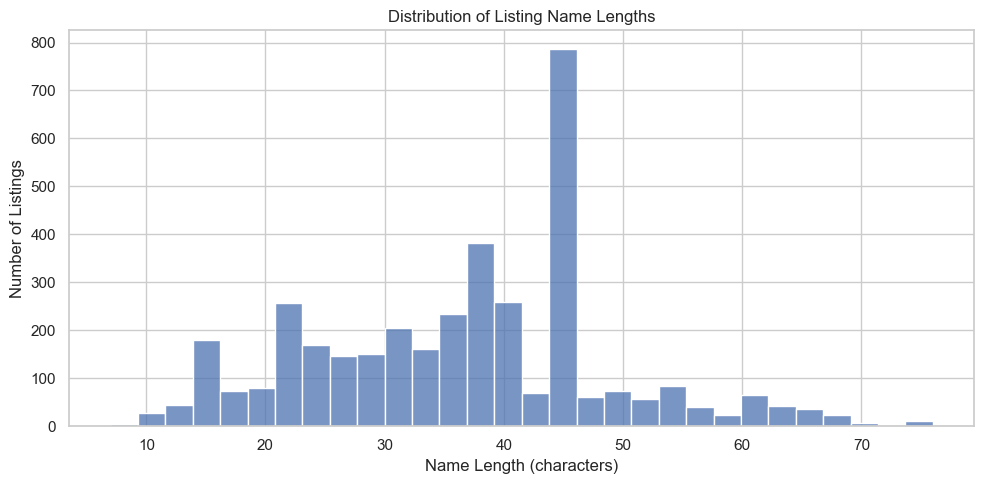

In [18]:
df['name_length'] = df['name'].str.len()
plt.figure(figsize=(10, 5))
sns.histplot(df['name_length'], bins=30)
plt.title("Distribution of Listing Name Lengths")
plt.xlabel("Name Length (characters)")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()

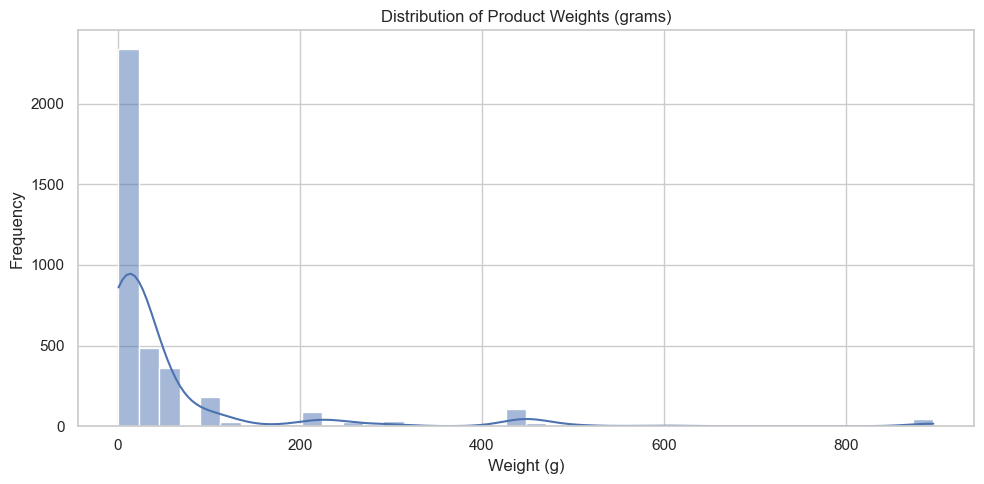

In [19]:
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
plt.figure(figsize=(10, 5))
sns.histplot(df['weight'], bins=40, kde=True)
plt.title("Distribution of Product Weights (grams)")
plt.xlabel("Weight (g)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

C:\Users\niels\AppData\Local\Temp\ipykernel_12548\2077042725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=origin_counts.values, y=origin_counts.index, palette="crest")


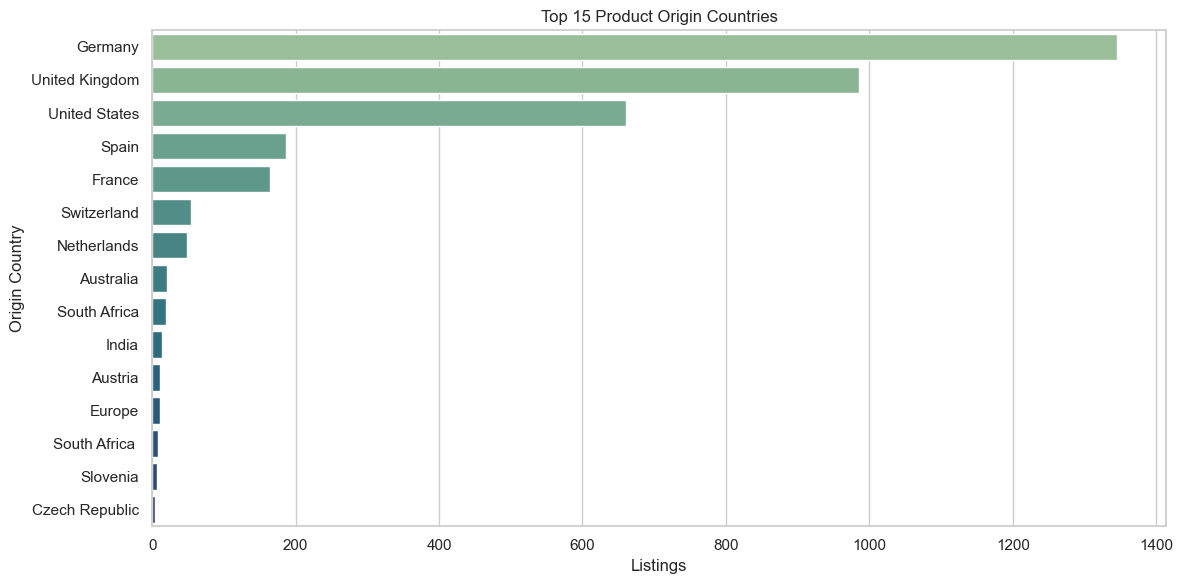

In [20]:
origin_counts = df['origin'].dropna().value_counts().head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=origin_counts.values, y=origin_counts.index, palette="crest")
plt.title("Top 15 Product Origin Countries")
plt.xlabel("Listings")
plt.ylabel("Origin Country")
plt.tight_layout()
plt.show()

In [23]:
import plotly.graph_objects as go

df['destination'] = df['destination'].str.strip().str.lower().str.replace('-', '').str.replace(' ', '')
df['destination'] = df['destination'].replace({
    'worldwide': 'Worldwide',
    'worldwide.': 'Worldwide',
    'worldwideandmore': 'Worldwide',
    'germanyand1more': 'Nan',
    'germanyand38more': 'Nan',
    'germanyand49more': 'Nan',
    'europeand1more': 'Europe',
    'europe+5': 'Europe',
    'europeanunion': 'Europe',
    'northamerica': 'North America',
    'europe': 'Europe',
        'europeand5more': 'Europe'
})




sankey_data = df[['origin', 'destination']].dropna()
sankey_data = sankey_data[sankey_data['origin'] != sankey_data['destination']]
top_flows = sankey_data.value_counts().reset_index().rename(columns={0: 'count'}).head(20)

origins = top_flows['origin'].unique().tolist()
destinations = top_flows['destination'].unique().tolist()
labels = origins + destinations
source_indices = [labels.index(o) for o in top_flows['origin']]
target_indices = [labels.index(d) for d in top_flows['destination']]

fig = go.Figure(data=[go.Sankey(
    node=dict(label=labels),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=top_flows['count'] * 3,
        color='rgba(31, 119, 180, 0.8)'  # semi-transparent blue
    )
)])

fig.update_layout(title_text="Top Product Flows (Origin → Destination)", font_size=10)
fig.show()



In [4]:
# Frequency of origin countries
print("🌍 Origin Frequency:")
print(df['origin'].value_counts(dropna=False))
print("\n")

# Frequency of destination regions
print("📦 Destination Frequency:")
print(df['destination'].value_counts(dropna=False))

🌍 Origin Frequency:
origin
Germany           1346
United Kingdom     985
United States      660
NaN                214
Spain              187
France             164
Switzerland         54
Netherlands         48
Australia           20
South Africa        19
India               14
Austria             11
Europe              11
South Africa         8
Slovenia             6
Czech Republic       4
Canada               2
Afghanistan          1
Name: count, dtype: int64


📦 Destination Frequency:
destination
Worldwide           1321
Europe              1173
unitedstates         385
unitedkingdom        296
North America        271
European Union        52
france                39
spain                 36
Europe +5             33
usa                   31
australia             20
netherlands           17
switzerland           16
india                 14
germanyand1more       13
germanyand38more      12
europeand1more        10
canada                 7
germany                6
germanyand49more   

In [ ]:

# Example: Your original DataFrame with 'origin' and 'destination' columns
# Replace this with your actual DataFrame
df=df[df['source'] == "Torzon"]

# Define mappings for destination
destination_mapping = {
    'germanyand1more': 'germany',
    'germanyand38more': 'germany',
    'germanyand49more': 'germany',
    'europeand1more': 'europe',
    'Europe +5': 'europe'
}

# Define mappings for origin if needed (similar approach)
origin_mapping = {
    # Add if you want to map something in origin, e.g.:
    # 'someoldname': 'newname'
}

# Normalize case to lowercase to avoid mismatches, then replace
df['destination_clean'] = df['destination'].str.lower().replace(
    {k.lower(): v.lower() for k, v in destination_mapping.items()}
)

df['origin_clean'] = df['origin'].str.lower().replace(
    {k.lower(): v.lower() for k, v in origin_mapping.items()}
)

# Now, group by the cleaned columns and count frequency
origin_freq = df['seller'].value_counts(dropna=False)
destination_freq = df['destination_clean'].value_counts(dropna=False)

# Check results
print("Origin Frequencies:\n", origin_freq)
print("\nDestination Frequencies:\n", destination_freq)



Origin Frequencies:
 origin_clean
germany           1182
united kingdom     642
united states      271
spain              118
netherlands         44
france              32
switzerland         31
austria             11
australia           10
south africa         7
slovenia             6
afghanistan          1
Name: count, dtype: int64

Destination Frequencies:
 destination_clean
worldwide        1057
europe           1027
north america     271
Name: count, dtype: int64


C:\Users\niels\AppData\Local\Temp\ipykernel_11488\4225187085.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\niels\AppData\Local\Temp\ipykernel_11488\4225187085.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



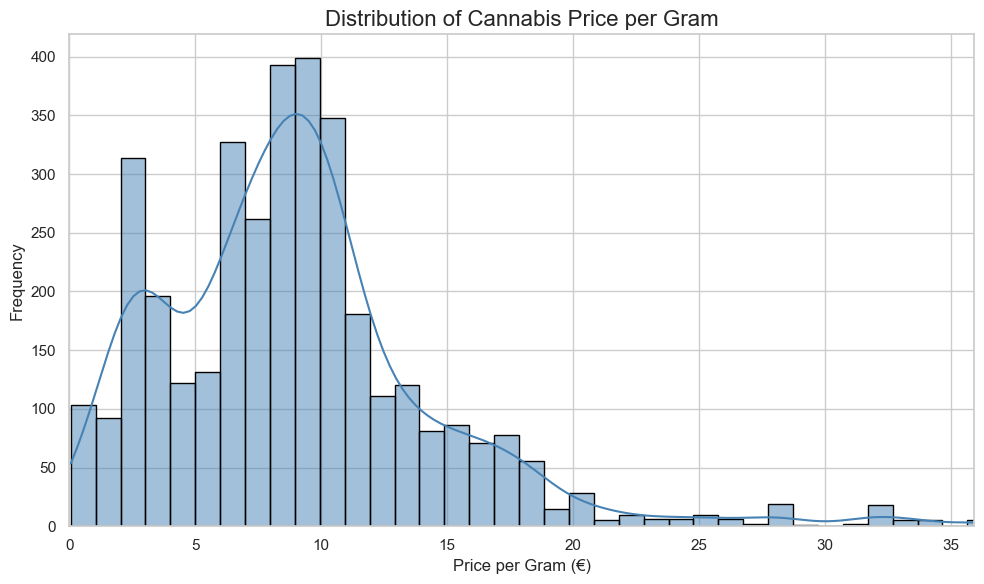

In [ ]:
# Set the plot style
sns.set(style="whitegrid")

# Create the histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['price per g'], bins=50, kde=True, color='steelblue', edgecolor='black')

# Add labels and title
plt.title("Distribution of Cannabis Price per Gram", fontsize=16)
plt.xlabel("Price per Gram (€)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Optional: Set x-axis limits to avoid long tails skewing the view
plt.xlim(0, df['price per g'].quantile(0.99))  # trims extreme outliers for better readability

# Show the plot
plt.tight_layout()
plt.show()


In [51]:
# Example: Your original DataFrame with 'origin' and 'destination' columns
# Replace this with your actual DataFrame
df2=df[df['source'] == "Elysium"]

# Now, group by the cleaned columns and count frequency
origin_freq = df2['seller'].value_counts(dropna=False)
destination_freq = df['seller'].value_counts(dropna=False)

# Check results
print("Origin Frequencies:\n", origin_freq)
print("\nDestination Frequencies:\n", destination_freq)

Origin Frequencies:
 seller
maurelius           94
DreamWeaver         15
revenantchild       13
PharmaPlug          13
cannagreen          11
Herodus              9
royalqueenweed       8
WorldOfSweets        8
NextGeneration       7
TopCat               6
StrainPirate         6
TopPlugz365          5
WeedShopHulk         4
happyweed            4
ozconnection         3
cannadepot           3
High00               2
BarNarcotikz         2
Archon               1
MoonlightSmoke       1
DieFeinschmecker     1
darkweeder           1
Name: count, dtype: int64

Destination Frequencies:
 seller
dreamjar           214
maurelius          180
DieseGute          174
QueenOfCannabis    172
Maling47           149
                  ... 
budreaper            1
moonbowco            1
EuroPartyDrugs       1
weedstore            1
TheGo2GuysGB         1
Name: count, Length: 182, dtype: int64
